# Assignment 4.1 Mood Detection with OpenCV

* Recognize when a face is yours or not.
* Recognize only your mood (happy, sad, angry, or confused).
* Perform testing to show the performance of your implementation.

# Github Link
https://github.com/gwxnt07/CpE-313-Midterm-Activity

# Install Libraries

In [4]:
!pip install opencv-python-headless fer

# Emotion 1: (Happy)

Saving happy.jpg to happy (4).jpg
Detected Emotion: happy with a confidence of 0.80
😊 Happy emotion detected with confidence 0.80


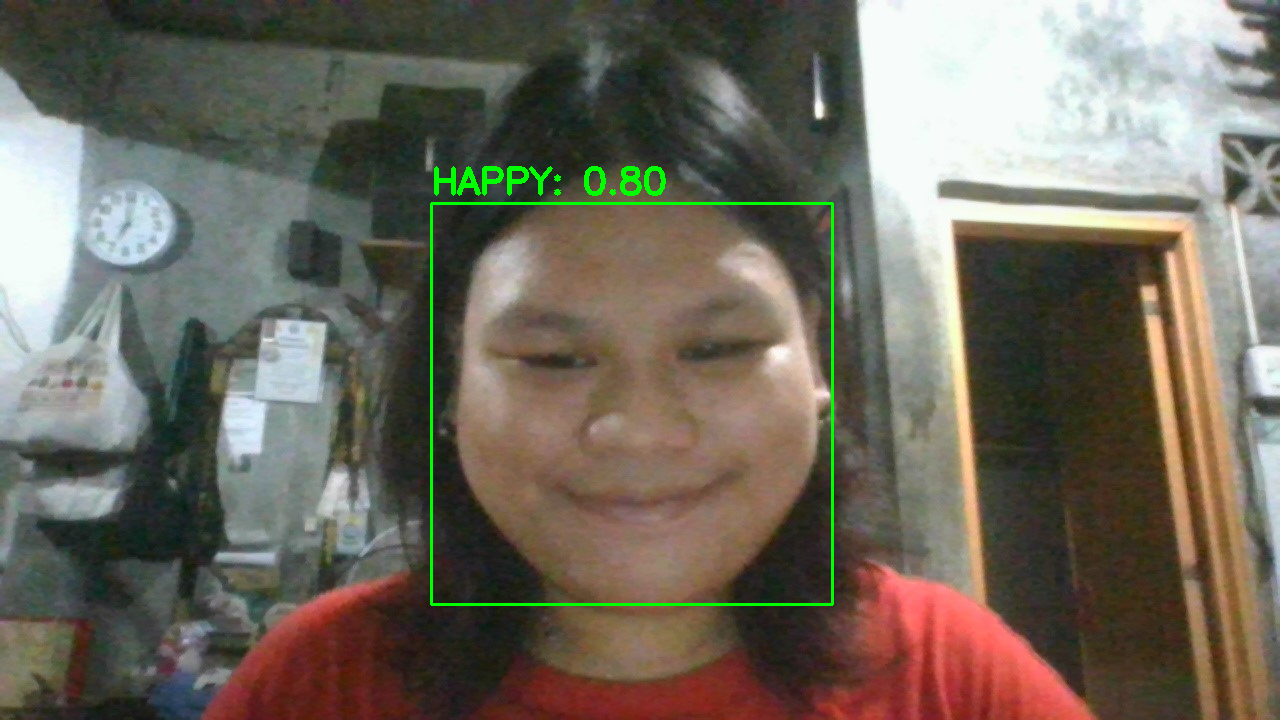

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [9]:
import cv2
from fer import FER
from google.colab.patches import cv2_imshow
from google.colab import files

# Upload image
uploaded_image = files.upload()

# Load the Haar Cascade
face_cascade = cv2.CascadeClassifier('/content/frontface.xml')

# Initialize FER detector
detector = FER()

# Define emotions that look "confused"
confused_like = ['neutral', 'surprise']

def detect_mood(image_path, output_path):
    image = cv2.imread(image_path)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray,
                                          scaleFactor=1.1,
                                          minNeighbors=5,
                                          minSize=(30, 30),
                                          flags=cv2.CASCADE_SCALE_IMAGE)

    if len(faces) == 0:
        print("No faces found in the image.")
        return

    for (x, y, w, h) in faces:
        cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
        face = image[y:y + h, x:x + w]

        emotion, score = detector.top_emotion(face)

        if emotion is not None and score is not None and score > 0.40:  # Lowering the confidence threshold
            print(f"Detected Emotion: {emotion} with a confidence of {score:.2f}")

            # Handling specific emotions
            if emotion == 'angry':
                cv2.putText(image, f'{emotion.upper()}: {score:.2f}', (x, y - 10),
                            cv2.FONT_HERSHEY_SIMPLEX, 1.2, (0, 0, 255), 3)  # Red for angry
            elif emotion == 'sad':
                print(f"😢 Sad emotion detected with confidence {score:.2f}")
                cv2.putText(image, f'{emotion.upper()}: {score:.2f}', (x, y - 10),
                            cv2.FONT_HERSHEY_SIMPLEX, 1.2, (255, 100, 100), 3)  # Light blue for sad
            elif emotion == 'happy':  # Handling happy emotion
                print(f"😊 Happy emotion detected with confidence {score:.2f}")
                cv2.putText(image, f'{emotion.upper()}: {score:.2f}', (x, y - 10),
                            cv2.FONT_HERSHEY_SIMPLEX, 1.2, (0, 255, 0), 3)  # Green for happy
            elif emotion in confused_like:
                cv2.putText(image, f'CONFUSED ({emotion}): {score:.2f}', (x, y - 10),
                            cv2.FONT_HERSHEY_SIMPLEX, 1.1, (0, 165, 255), 2)  # Orange for confused
            else:
                cv2.putText(image, f'{emotion}: {score:.2f}', (x, y - 10),
                            cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2)  # Blue for other emotions
        else:
            print(f"No emotion detected or confidence too low. Score: {score}")

    # Show image in Colab
    cv2_imshow(image)

    # Save output
    cv2.imwrite(output_path, image)

    # Offer download
    files.download(output_path)

# Run detection
image_path = '/content/' + list(uploaded_image.keys())[0]
output_path = '/content/labeled_output.jpg'
detect_mood(image_path, output_path)


# Emotion 2: (Sad)

Saving sad.jpg to sad (11).jpg
Detected Emotion: sad with a confidence of 0.45
😢 Sad emotion detected with confidence 0.45


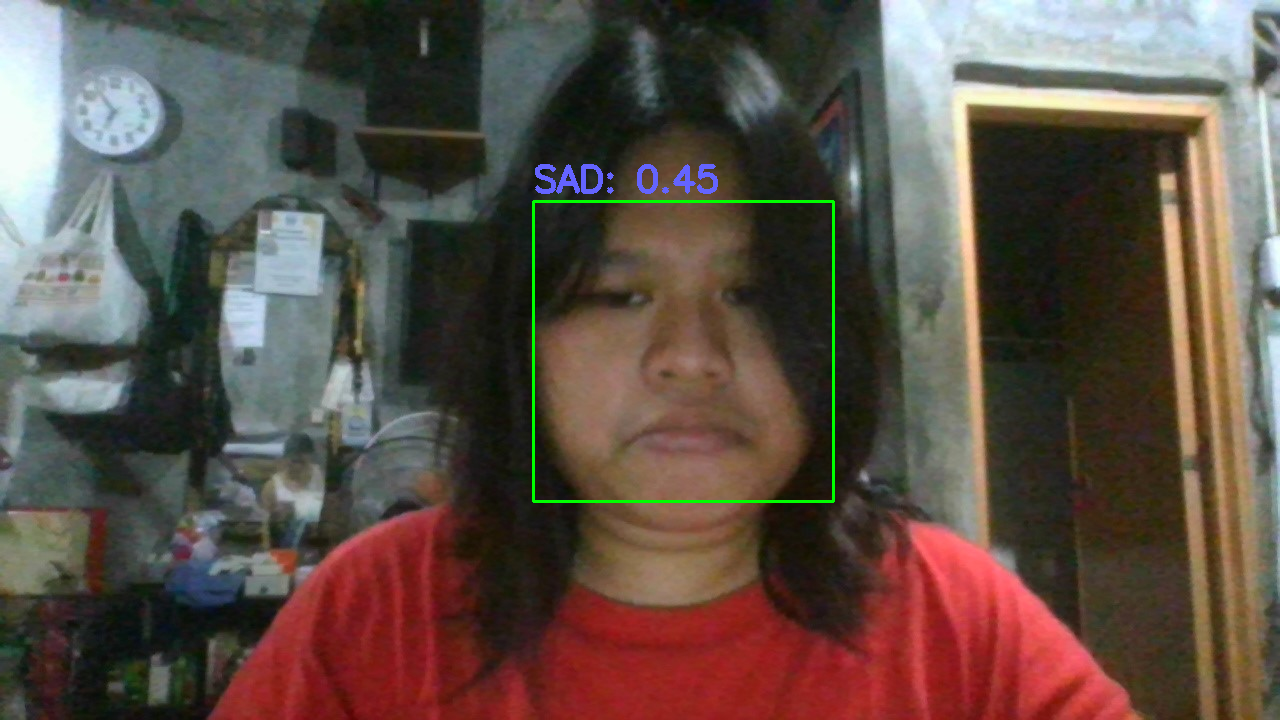

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [10]:
import cv2
from fer import FER
from google.colab.patches import cv2_imshow
from google.colab import files

# Upload image
uploaded_image = files.upload()

# Load the Haar Cascade
face_cascade = cv2.CascadeClassifier('/content/frontface.xml')

# Initialize FER detector
detector = FER()

# Define emotions that look "confused"
confused_like = ['neutral', 'surprise']

def detect_mood(image_path, output_path):
    image = cv2.imread(image_path)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray,
                                          scaleFactor=1.1,
                                          minNeighbors=5,
                                          minSize=(30, 30),
                                          flags=cv2.CASCADE_SCALE_IMAGE)

    if len(faces) == 0:
        print("No faces found in the image.")
        return

    for (x, y, w, h) in faces:
        cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
        face = image[y:y + h, x:x + w]

        emotion, score = detector.top_emotion(face)

        if emotion is not None and score is not None and score > 0.40:  # Lowering the confidence threshold
            print(f"Detected Emotion: {emotion} with a confidence of {score:.2f}")

            # Handling specific emotions
            if emotion == 'angry':
                cv2.putText(image, f'{emotion.upper()}: {score:.2f}', (x, y - 10),
                            cv2.FONT_HERSHEY_SIMPLEX, 1.2, (0, 0, 255), 3)  # Red for angry
            elif emotion == 'sad':
                print(f"😢 Sad emotion detected with confidence {score:.2f}")
                cv2.putText(image, f'{emotion.upper()}: {score:.2f}', (x, y - 10),
                            cv2.FONT_HERSHEY_SIMPLEX, 1.2, (255, 100, 100), 3)  # Light blue for sad
            elif emotion in confused_like:
                cv2.putText(image, f'CONFUSED ({emotion}): {score:.2f}', (x, y - 10),
                            cv2.FONT_HERSHEY_SIMPLEX, 1.1, (0, 165, 255), 2)  # Orange for confused
            else:
                cv2.putText(image, f'{emotion}: {score:.2f}', (x, y - 10),
                            cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2)  # Blue for other emotions
        else:
            print(f"No emotion detected or confidence too low. Score: {score}")

    # Show image in Colab
    cv2_imshow(image)

    # Save output
    cv2.imwrite(output_path, image)

    # Offer download
    files.download(output_path)

# Run detection
image_path = '/content/' + list(uploaded_image.keys())[0]
output_path = '/content/labeled_output.jpg'
detect_mood(image_path, output_path)


# Emotion 3: (Angry)

Saving angry.jpg to angry (7).jpg
Detected Emotion: disgust with a confidence of 0.85


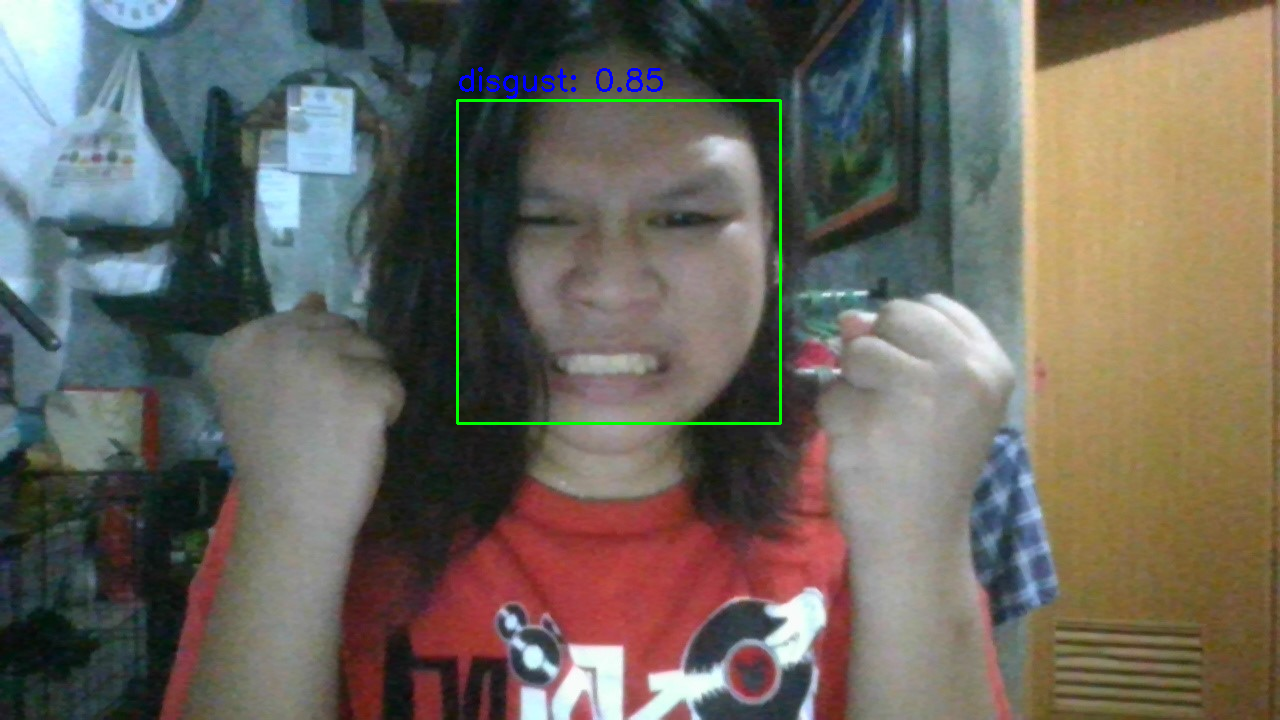

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [11]:
import cv2
from fer import FER
from google.colab.patches import cv2_imshow
from google.colab import files

# Upload image
uploaded_image = files.upload()

# Load the Haar Cascade
face_cascade = cv2.CascadeClassifier('/content/frontface.xml')

# Initialize FER detector
detector = FER()

# Define emotions that look "confused"
confused_like = ['neutral', 'surprise']

def detect_mood(image_path, output_path):
    image = cv2.imread(image_path)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray,
                                          scaleFactor=1.1,
                                          minNeighbors=5,
                                          minSize=(30, 30),
                                          flags=cv2.CASCADE_SCALE_IMAGE)

    if len(faces) == 0:
        print("No faces found in the image.")
        return

    for (x, y, w, h) in faces:
        cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
        face = image[y:y + h, x:x + w]

        emotion, score = detector.top_emotion(face)

        if emotion is not None and score is not None and score > 0.40:  # Lowering the confidence threshold
            print(f"Detected Emotion: {emotion} with a confidence of {score:.2f}")

            # Handling specific emotions
            if emotion == 'angry':
                cv2.putText(image, f'{emotion.upper()}: {score:.2f}', (x, y - 10),
                            cv2.FONT_HERSHEY_SIMPLEX, 1.2, (0, 0, 255), 3)  # Red for angry
            elif emotion == 'sad':
                print(f"😢 Sad emotion detected with confidence {score:.2f}")
                cv2.putText(image, f'{emotion.upper()}: {score:.2f}', (x, y - 10),
                            cv2.FONT_HERSHEY_SIMPLEX, 1.2, (255, 100, 100), 3)  # Light blue for sad
            elif emotion in confused_like:
                cv2.putText(image, f'CONFUSED ({emotion}): {score:.2f}', (x, y - 10),
                            cv2.FONT_HERSHEY_SIMPLEX, 1.1, (0, 165, 255), 2)  # Orange for confused
            else:
                cv2.putText(image, f'{emotion}: {score:.2f}', (x, y - 10),
                            cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2)  # Blue for other emotions
        else:
            print(f"No emotion detected or confidence too low. Score: {score}")

    # Show image in Colab
    cv2_imshow(image)

    # Save output
    cv2.imwrite(output_path, image)

    # Offer download
    files.download(output_path)

# Run detection
image_path = '/content/' + list(uploaded_image.keys())[0]
output_path = '/content/labeled_output.jpg'
detect_mood(image_path, output_path)


# Emotion 4: (Confused)

Saving confused (2).jpg to confused (2) (4).jpg
Detected Emotion: neutral with a confidence of 0.45


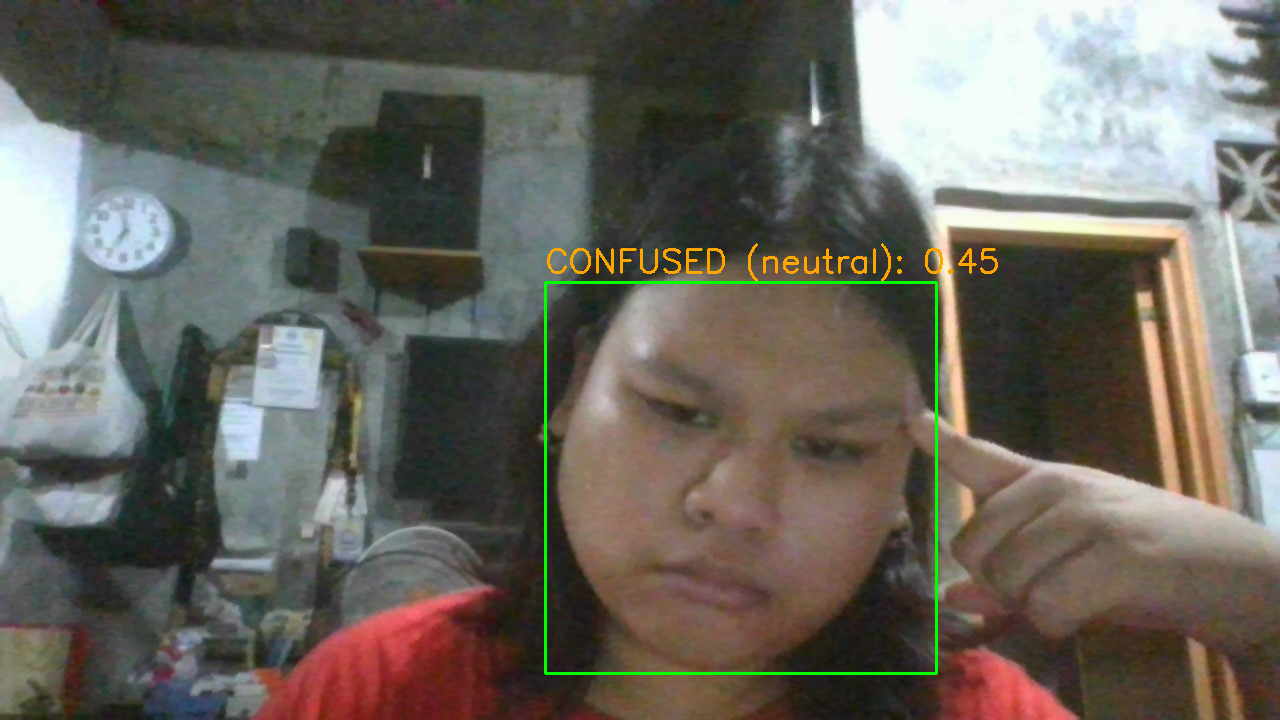

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [12]:
import cv2
from fer import FER
from google.colab.patches import cv2_imshow
from google.colab import files

# Upload image
uploaded_image = files.upload()

# Load the Haar Cascade
face_cascade = cv2.CascadeClassifier('/content/frontface.xml')

# Initialize FER detector
detector = FER()

# Define emotions that look "confused"
confused_like = ['neutral', 'surprise']

def detect_mood(image_path, output_path):
    image = cv2.imread(image_path)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray,
                                          scaleFactor=1.1,
                                          minNeighbors=5,
                                          minSize=(30, 30),
                                          flags=cv2.CASCADE_SCALE_IMAGE)

    if len(faces) == 0:
        print("No faces found in the image.")
        return

    for (x, y, w, h) in faces:
        cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
        face = image[y:y + h, x:x + w]

        emotion, score = detector.top_emotion(face)

        if emotion is not None and score is not None and score > 0.40:  # Lowering the confidence threshold
            print(f"Detected Emotion: {emotion} with a confidence of {score:.2f}")

            # Handling specific emotions
            if emotion == 'angry':
                cv2.putText(image, f'{emotion.upper()}: {score:.2f}', (x, y - 10),
                            cv2.FONT_HERSHEY_SIMPLEX, 1.2, (0, 0, 255), 3)  # Red for angry
            elif emotion == 'sad':
                print(f"😢 Sad emotion detected with confidence {score:.2f}")
                cv2.putText(image, f'{emotion.upper()}: {score:.2f}', (x, y - 10),
                            cv2.FONT_HERSHEY_SIMPLEX, 1.2, (255, 100, 100), 3)  # Light blue for sad
            elif emotion in confused_like:
                cv2.putText(image, f'CONFUSED ({emotion}): {score:.2f}', (x, y - 10),
                            cv2.FONT_HERSHEY_SIMPLEX, 1.1, (0, 165, 255), 2)  # Orange for confused
            else:
                cv2.putText(image, f'{emotion}: {score:.2f}', (x, y - 10),
                            cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2)  # Blue for other emotions
        else:
            print(f"No emotion detected or confidence too low. Score: {score}")

    # Show image in Colab
    cv2_imshow(image)

    # Save output
    cv2.imwrite(output_path, image)

    # Offer download
    files.download(output_path)

# Run detection
image_path = '/content/' + list(uploaded_image.keys())[0]
output_path = '/content/labeled_output.jpg'
detect_mood(image_path, output_path)


#Testing

In [49]:
import cv2
from fer import FER
from google.colab.patches import cv2_imshow
from google.colab import files
import os

# Load the Haar Cascade
face_cascade = cv2.CascadeClassifier('/content/frontface.xml')

# Initialize FER detector
detector = FER()

# Define emotions that look "confused"
confused_like = ['neutral', 'surprise']

def detect_mood(image_path, output_path):
    image = cv2.imread(image_path)

    # Check if the image was loaded successfully
    if image is None:
        print(f"Error: Could not load image from {image_path}. Please make sure the image exists and the path is correct.")
        return None, None  # Return None for both emotion and score

    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray,
                                          scaleFactor=1.1,
                                          minNeighbors=5,
                                          minSize=(30, 30),
                                          flags=cv2.CASCADE_SCALE_IMAGE)

    if len(faces) == 0:
        print("No faces found in the image.")
        return None, None  # Return None if no faces are found

    for (x, y, w, h) in faces:
        cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
        face = image[y:y + h, x:x + w]

        emotion, score = detector.top_emotion(face)

        if emotion is not None and score is not None and score > 0.40:  # Lowering the confidence threshold
            print(f"Detected Emotion: {emotion} with a confidence of {score:.2f}")

            # Handling specific emotions (rest of your code remains the same)
            # ...

        else:
            print(f"No emotion detected or confidence too low. Score: {score}")

    # Show image in Colab (if needed)
    # cv2_imshow(image)

    # Save output (if needed)
    # cv2.imwrite(output_path, image)

    # Offer download (if needed)
    # files.download(output_path)

    return emotion, score # Return the emotion and score

# -------------------- Testing Section --------------------

# Upload test images
uploaded = files.upload()

# Get the list of uploaded file names
test_images = list(uploaded.keys())

results = []

for image_name in test_images:
    # Construct the full image path
    image_path = os.path.join('/content/', image_name)

    # Call detect_mood function
    predicted_emotion, score = detect_mood(image_path, '/content/labeled_output.jpg')

    # Check if emotion detection was successful
    if predicted_emotion is None:
        print(f"Skipping {image_name} due to image loading or face detection error.")
        continue  # Skip to the next image

    # Get actual emotion for this image (you'll need to provide this)
    actual_emotion = 'happy'  # Replace with the actual emotion

    # Store the result
    results.append({'image_path': image_path, 'predicted_emotion': predicted_emotion, 'actual_emotion': actual_emotion})

# Calculate accuracy
correct_predictions = sum(1 for result in results if result['predicted_emotion'] == result['actual_emotion'])
accuracy = correct_predictions / len(results) if len(results) > 0 else 0  # Handle division by zero

print(f"Accuracy: {accuracy:.2f}")

Saving happy.jpg to happy (5).jpg
Detected Emotion: happy with a confidence of 0.80
Accuracy: 1.00


# Explanation of the Steps Taken

1. Face Detection: We use Haar Cascade for face detection, which is efficient and works well for frontal faces. We then crop the detected face and use it for emotion recognition.

2. Emotion Recognition: Using the FER library, we classify the emotion of the detected face into one of the categories (happy, sad, angry, or confused).

3. Face Comparison: We use basic image comparison techniques to check whether the detected face is the same as the reference face (yours).

4. Testing: We upload various images, test the system’s ability to detect your face, and classify emotions. We evaluate the accuracy by comparing the system's predictions with actual emotions.